# Machine learning, a tutorial, part I

## 1-0 Sunmary
In this tutorial, a dataset about Melbourne Housing is being used.
The goal is building good machine learning models to PREDITCT HOUSE PRICE.


## 1-1: What is machine learning?

## 1-2: Data type and a quick trip

In [1]:
## import packages
import pandas as pd

## some setting for better reading experience
from IPython.display import display
pd.options.display.max_columns = None
pd.set_option('display.float_format', lambda x: '%.4f' % x)

##  
randomState = 274

In [2]:
## read data 
melb = pd.read_csv("data/melb_data.csv").sample(frac=1, random_state=randomState).reset_index(drop=True)

## a quick peek
melb.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Reservoir,19 Lucille Av,3,h,775500.0000,S,Ray,19/08/2017,12.0000,3073.0000,3.0000,1.0000,3.0000,586.0000,120.0000,1960.0000,NaN,-37.6998,145.0220,Northern Metropolitan,21650.0000
1,Moonee Ponds,184 Maribyrnong Rd,3,h,1375000.0000,S,Brad,24/06/2017,6.2000,3039.0000,3.0000,1.0000,1.0000,449.0000,NaN,NaN,Moonee Valley,-37.7711,144.9116,Western Metropolitan,6232.0000
2,Fitzroy North,264 Barkly St,3,h,1600000.0000,S,Collins,25/02/2017,3.5000,3068.0000,3.0000,1.0000,0.0000,370.0000,NaN,NaN,Yarra,-37.7794,144.9892,Northern Metropolitan,6244.0000
3,Point Cook,38 Yuruga Bvd,4,h,635000.0000,S,hockingstuart,16/09/2017,14.7000,3030.0000,4.0000,2.0000,2.0000,334.0000,244.0000,2000.0000,NaN,-37.9058,144.7486,Western Metropolitan,15542.0000
4,Bentleigh,4a Rosina St,4,t,1247000.0000,S,hockingstuart,15/10/2016,13.0000,3204.0000,4.0000,2.0000,3.0000,354.0000,255.0000,2008.0000,Glen Eira,-37.9326,145.0441,Southern Metropolitan,6795.0000


### Notes on Specific Variables

* Rooms: Number of rooms

* Price: Price in dollars

* Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

* Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

* SellerG: Real Estate Agent

* Date: Date sold

* Distance: Distance from CBD

* Regionname: General Region (West, North West, North, North east …etc)

* Propertycount: Number of properties that exist in the suburb.

* Bedroom2 : Scraped # of Bedrooms (from different source)

* Bathroom: Number of Bathrooms

* Car: Number of carspots

* Landsize: Land Size

* BuildingArea: Building Size

* CouncilArea: Governing council for the area



In [3]:
## data types in machine learning (or statistics)
## https://en.wikipedia.org/wiki/Statistical_data_type

## data types in python(pandas) 
## object ~ categorical
## float/int ~ numeric
melb.dtypes


Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

### Categorical variable: Date

In [4]:
## the operations can be applied on object/float are different
print("Date in first row:" ,melb.Date[0], "\nDate in second row",melb.Date[1])

## it's obvious to us that subtraction between two dates is reasonable
## try to calculate day_diff.....
print(melb.Date[0] - melb.Date[1])



Date in first row: 19/08/2017 
Date in second row 24/06/2017


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [5]:
## into datetime format
melb["Date_in_datetime"] = pd.to_datetime(melb.Date)

## the data types of two version of date are different
## the later is actually numeric 
melb[["Date", "Date_in_datetime"]].head().dtypes


Date                        object
Date_in_datetime    datetime64[ns]
dtype: object

In [6]:
## Date_in_datetime is well-formated (wrapped)
melb[["Date", "Date_in_datetime"]].head()

,Date,Date_in_datetime
0,19/08/2017,2017-08-19
1,24/06/2017,2017-06-24
2,25/02/2017,2017-02-25
3,16/09/2017,2017-09-16
4,15/10/2016,2016-10-15


In [7]:
## Since the datetime data type is numeric, do some operation
day_diff_1 = melb.Date_in_datetime[0] - melb.Date_in_datetime[1]

## the wrapped number
print("Day difference is:" , day_diff_1)

## the naked number
print("Day difference is:" , day_diff_1.days)

Day difference is: 56 days 00:00:00
Day difference is: 56


In [8]:
## into a more "pure" numeric format
melb["Date_num"] = pd.to_datetime(melb.Date).astype("int")

## It's UNIX time in nanoseconds!
## https://zh.wikipedia.org/wiki/UNIX时间
print(melb["Date_num"].head())

0    1503100800000000000
1    1498262400000000000
2    1487980800000000000
3    1505520000000000000
4    1476489600000000000
Name: Date_num, dtype: int64


In [9]:
## same calculation.....
day_diff_2 = melb.Date_num[0] - melb.Date_num[1]
print("Day difference is:" , day_diff_2 / (10**9 * 60 * 60 *24))

Day difference is: 56.0


In [10]:
## why is the difference of data dypes important?
## to describe a categorical column
melb.Date.describe()

count          13580
unique            58
top       27/05/2017
freq             473
Name: Date, dtype: object

In [11]:
## to describe a numeric column  
melb.Date_num.describe()

count                 13580.0000
mean    1484739794756995840.0000
std       15520174588577786.0000
min     1453939200000000000.0000
25%     1470787200000000000.0000
50%     1487980800000000000.0000
75%     1498262400000000000.0000
max     1512691200000000000.0000
Name: Date_num, dtype: float64

In [12]:
## How to make the description more readable?
## aka. Can your mom understand this?
melb.Date_num.describe()

count                 13580.0000
mean    1484739794756995840.0000
std       15520174588577786.0000
min     1453939200000000000.0000
25%     1470787200000000000.0000
50%     1487980800000000000.0000
75%     1498262400000000000.0000
max     1512691200000000000.0000
Name: Date_num, dtype: float64

In [13]:
## Other than subtraction.....
print("Sort the original format(string): \n")
print(melb.Date.head().sort_values())

print("Sort the datetime formate: \n")
print(melb.Date_in_datetime.head().sort_values())

Sort the original format(string): 

4    15/10/2016
3    16/09/2017
0    19/08/2017
1    24/06/2017
2    25/02/2017
Name: Date, dtype: object
Sort the datetime formate: 

4   2016-10-15
2   2017-02-25
1   2017-06-24
0   2017-08-19
3   2017-09-16
Name: Date_in_datetime, dtype: datetime64[ns]


In [14]:
## The right "order" of a variable especially crucial when making a graph!

### Categorical variable: Region

In [15]:
## Date is natually can be understand as an numeric sequence
## But how about other categorical variables?
melb.Regionname.value_counts()

Southern Metropolitan         4695
Northern Metropolitan         3890
Western Metropolitan          2948
Eastern Metropolitan          1471
South-Eastern Metropolitan     450
Eastern Victoria                53
Northern Victoria               41
Western Victoria                32
Name: Regionname, dtype: int64

In [16]:
melb.Regionname.head(10)

0    Northern Metropolitan
1     Western Metropolitan
2    Northern Metropolitan
3     Western Metropolitan
4    Southern Metropolitan
5    Southern Metropolitan
6     Western Metropolitan
7     Eastern Metropolitan
8     Western Metropolitan
9    Southern Metropolitan
Name: Regionname, dtype: object

In [17]:
## encode Regionname into numeric
pd.factorize(melb.Regionname)

(array([0, 1, 0, ..., 0, 3, 3]),
 Index(['Northern Metropolitan', 'Western Metropolitan',
        'Southern Metropolitan', 'Eastern Metropolitan', 'Eastern Victoria',
        'Western Victoria', 'South-Eastern Metropolitan', 'Northern Victoria'],
       dtype='object'))

In [18]:
## create a factorized column
melb["Regionname_factor"] = pd.factorize(melb.Regionname)[0]
melb[["Regionname", "Regionname_factor"]].head(10)

,Regionname,Regionname_factor
0,Northern Metropolitan,0
1,Western Metropolitan,1
2,Northern Metropolitan,0
3,Western Metropolitan,1
4,Southern Metropolitan,2
5,Southern Metropolitan,2
6,Western Metropolitan,1
7,Eastern Metropolitan,3
8,Western Metropolitan,1
9,Southern Metropolitan,2


## Exploratory Data Analysis

It's hard to teach you something solid about EDA in less than 1 hour. In my opinion, EDA is more like art than science. The sense is CULTIVATED with reading good works and practise. What I can do here is to show you a really small part of code when I'm exploring this Melbourne dataset....

And of course, there will be a lot of reading material for you!

The main purpose of this tutorial is to PREDICT PRICE. Keep this in mind when doing EDA!

### Table & Descriptive Statistics

In [19]:
## describe method offers a simple statitical overview(for numeric columns, by default)
melb.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Date_num,Regionname_factor
count,13580.0000,13580.0000,13580.0000,13580.0000,13580.0000,13580.0000,13518.0000,13580.0000,7130.0000,8205.0000,13580.0000,13580.0000,13580.0000,13580.0000,13580.0000
mean,2.9380,1075684.0795,10.1378,3105.3019,2.9147,1.5342,1.6101,558.4161,151.9676,1964.6842,-37.8092,144.9952,7454.4174,1484739794756995840.0000,1.4809
std,0.9557,639310.7243,5.8687,90.6770,0.9659,0.6917,0.9626,3990.6692,541.0145,37.2738,0.0793,0.1039,4378.5818,15520174588577786.0000,1.3581
min,1.0000,85000.0000,0.0000,3000.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1196.0000,-38.1825,144.4318,249.0000,1453939200000000000.0000,0.0000
25%,2.0000,650000.0000,6.1000,3044.0000,2.0000,1.0000,1.0000,177.0000,93.0000,1940.0000,-37.8568,144.9296,4380.0000,1470787200000000000.0000,0.0000
50%,3.0000,903000.0000,9.2000,3084.0000,3.0000,1.0000,2.0000,440.0000,126.0000,1970.0000,-37.8024,145.0001,6555.0000,1487980800000000000.0000,1.0000
75%,3.0000,1330000.0000,13.0000,3148.0000,3.0000,2.0000,2.0000,651.0000,174.0000,1999.0000,-37.7564,145.0583,10331.0000,1498262400000000000.0000,2.0000
max,10.0000,9000000.0000,48.1000,3977.0000,20.0000,8.0000,10.0000,433014.0000,44515.0000,2018.0000,-37.4085,145.5264,21650.0000,1512691200000000000.0000,7.0000


In [20]:
## to have one for categorical colunmns
melb.describe(include=['object'])

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,13580,13580,13580,13580,13580,13580,12211,13580
unique,314,13378,3,5,268,58,33,8
top,Reservoir,14 Arthur St,h,S,Nelson,27/05/2017,Moreland,Southern Metropolitan
freq,359,3,9449,9022,1565,473,1163,4695


In [21]:
## One variable 
## the Room variable is an integer and not so many distinct values (here, 1 to 10)
## 
## the mean-std thing may not be helpful.....
melb.Rooms.describe()

count   13580.0000
mean        2.9380
std         0.9557
min         1.0000
25%         2.0000
50%         3.0000
75%         3.0000
max        10.0000
Name: Rooms, dtype: float64

In [22]:
## Discrete distribution
melb.Rooms.value_counts().sort_index()

1      681
2     3648
3     5881
4     2688
5      596
6       67
7       10
8        8
10       1
Name: Rooms, dtype: int64

In [23]:
## Grouped statistics
## It's a two variables analysis now

## What does the the groupby operation mean?

## In general,more room, higher the mean price is  
## If I'm going to predict the price, should I put this variable into the model?
melb.groupby("Rooms").Price.describe()


,count,mean,std,min,25%,50%,75%,max
Rooms,,,,,,,,
1,681.0000,433824.4508,224985.7012,85000.0000,325000.0000,385000.0000,460000.0000,2450000.0000
2,3648.0000,775081.1894,356125.9461,190000.0000,535000.0000,690000.0000,912625.0000,4800000.0000
3,5881.0000,1076080.6249,502106.1372,283000.0000,725000.0000,950000.0000,1320000.0000,9000000.0000
4,2688.0000,1445281.7359,747487.1970,131000.0000,902000.0000,1285000.0000,1786250.0000,7650000.0000
5,596.0000,1870260.4161,982349.3014,355000.0000,1150000.0000,1660000.0000,2400000.0000,8000000.0000
6,67.0000,1849365.6716,1094246.5534,506000.0000,1167500.0000,1800000.0000,2125000.0000,6500000.0000
7,10.0000,1920700.0000,947620.0657,1005000.0000,1312500.0000,1496000.0000,2450000.0000,4050000.0000
8,8.0000,1602750.0000,830626.3987,741000.0000,853250.0000,1515000.0000,2212500.0000,2950000.0000
10,1.0000,900000.0000,NaN,900000.0000,900000.0000,900000.0000,900000.0000,900000.0000


In [24]:
## The fact that Room has only 10 distinct values allows us 
## to summarize other varibles as if it's a categorical variable.
## What if not? 

## the Landsize variable is an float (continuous)

melb.Landsize.describe()

count    13580.0000
mean       558.4161
std       3990.6692
min          0.0000
25%        177.0000
50%        440.0000
75%        651.0000
max     433014.0000
Name: Landsize, dtype: float64

In [25]:
## Distribution....... ummmmmmm
melb.Landsize.value_counts().sort_index()

0.0000         1939
1.0000            2
2.0000            1
3.0000            1
5.0000            1
               ... 
41400.0000        1
44500.0000        1
75100.0000        1
76000.0000        1
433014.0000       1
Name: Landsize, Length: 1448, dtype: int64

In [ ]:
## Grouped statistics.....
## please don't do this
melb.groupby("Landsize").Price.describe()

In [26]:
## When the tool of grouped statistics is working.....
## We may need something more abstract

## Correlation matrix
melb.corr()


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Date_num,Regionname_factor
Rooms,1.0000,0.4966,0.2942,0.0553,0.9442,0.5929,0.4085,0.0257,0.1241,-0.0654,0.0159,0.1008,-0.0815,0.1015,0.1540
Price,0.4966,1.0000,-0.1625,0.1079,0.4760,0.4670,0.2390,0.0375,0.0910,-0.3236,-0.2129,0.2037,-0.0422,0.0114,0.1324
Distance,0.2942,-0.1625,1.0000,0.4315,0.2959,0.1272,0.2630,0.0250,0.0995,0.2464,-0.1307,0.2394,-0.0549,0.2583,0.5141
Postcode,0.0553,0.1079,0.4315,1.0000,0.0606,0.1137,0.0503,0.0246,0.0555,0.0329,-0.4061,0.4454,0.0623,0.1007,0.5029
Bedroom2,0.9442,0.4760,0.2959,0.0606,1.0000,0.5847,0.4053,0.0256,0.1223,-0.0533,0.0159,0.1022,-0.0814,0.1246,0.1567
Bathroom,0.5929,0.4670,0.1272,0.1137,0.5847,1.0000,0.3222,0.0371,0.1119,0.1527,-0.0706,0.1190,-0.0522,0.0494,0.1525
Car,0.4085,0.2390,0.2630,0.0503,0.4053,0.3222,1.0000,0.0268,0.0961,0.1045,-0.0020,0.0634,-0.0243,0.0936,0.1208
Landsize,0.0257,0.0375,0.0250,0.0246,0.0256,0.0371,0.0268,1.0000,0.5005,0.0365,0.0097,0.0108,-0.0069,0.0348,0.0157
BuildingArea,0.1241,0.0910,0.0995,0.0555,0.1223,0.1119,0.0961,0.5005,1.0000,0.0197,0.0434,-0.0238,-0.0288,0.0221,0.0729
YearBuilt,-0.0654,-0.3236,0.2464,0.0329,-0.0533,0.1527,0.1045,0.0365,0.0197,1.0000,0.0604,-0.0035,0.0064,0.1014,0.0641


In [27]:
## With this tool, we can have a quick overview about the relationships between variables
## Are those variables having small coefficients with Price should be excluded from model?
## What is correlation in statistics?
## What is correlation in real world?

## Is the coefficients with Regionname_factor making sense?

In [27]:
## With the result above, 
## I'm curious why there is a negative correlation relationship between Price and YearBuilt.
## Since it implies when YearBuilt goes up ("younger"), 
## Price will tend to be down ("Cheaper")

mean_price_by_year = melb.groupby("YearBuilt").Price.aggregate(["count", "mean"])

## After the aggregate operation, YearBuilt is no longer treated as varible, but index
## use reset_index to unset thing transformation
mean_price_by_year = mean_price_by_year.reset_index()

mean_price_by_year[mean_price_by_year.YearBuilt > 1950] 

,YearBuilt,count,mean
76,1951.0000,4,1762875.0000
77,1952.0000,4,1172500.0000
78,1953.0000,5,1357000.0000
79,1954.0000,3,1063666.6667
80,1955.0000,100,1064687.5000
...,...,...,...
139,2014.0000,100,921915.0000
140,2015.0000,65,1231484.6154
141,2016.0000,58,1523655.1724
142,2017.0000,18,1037972.2778


### Data Visualization

In [29]:
## The table of mean Price by YearBuilt is hard to read.....
## Try some visualization maybe?


<AxesSubplot:xlabel='YearBuilt'>

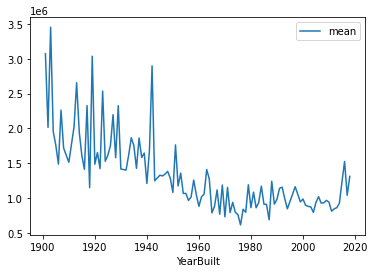

In [30]:
## A line plot of mean price, by yearbuilt
## The correlation is right, the younger the cheaper.....

mean_price_by_year[mean_price_by_year.YearBuilt > 1900].plot(x="YearBuilt", y="mean") 

In [31]:
## Maybe the old building is bigger?
## a new column is coming....
melb["unit_price"] = melb.Price / melb.BuildingArea
melb[["Price", "unit_price", "YearBuilt"]].corr()



,Price,unit_price,YearBuilt
Price,1.0000,0.0622,-0.3236
unit_price,0.0622,1.0000,-0.0070
YearBuilt,-0.3236,-0.0070,1.0000


In [32]:
## After these few code blocks, what do we know now?
## 1. We should put YearBuilt and BuildingArea into the model together if we need one of them
## 2. Can I use unit_price in the prediction model?

In [33]:
## I can show you more about the visualization tools often used in my works....

<AxesSubplot:>

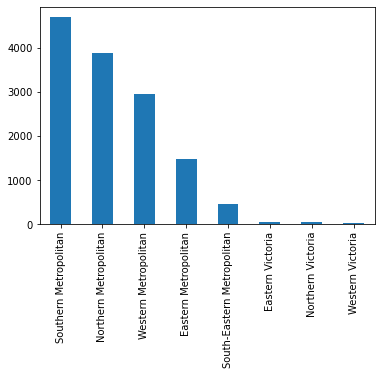

In [34]:
## Bar plot
melb.Regionname.value_counts().plot.bar()

<AxesSubplot:ylabel='Frequency'>

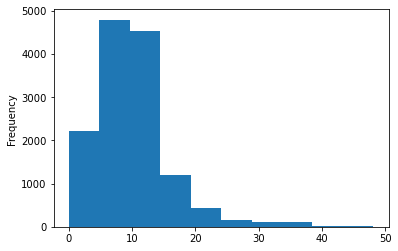

In [35]:
## histogram
## What is the difference betweeen bar plot and histogram?
melb.Distance.plot.hist()

<AxesSubplot:ylabel='Density'>

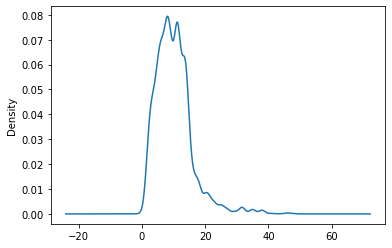

In [36]:
## density
## What is the difference betweeen density and histogram?
melb.Distance.plot.kde()

<AxesSubplot:>

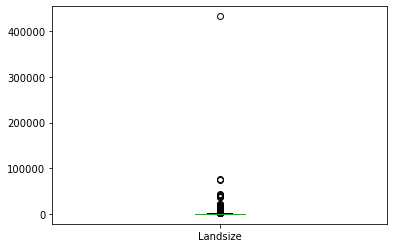

In [37]:
## Boxplot 
## The dot donates outliers.....
melb.Landsize.plot.box()

<AxesSubplot:xlabel='Landsize', ylabel='Price'>

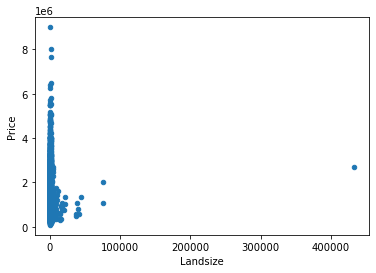

In [38]:
## scatter plot
## yeah these crazy outliers og Landsize make this plot valueless
melb.plot.scatter(x="Landsize", y="Price")


<AxesSubplot:xlabel='Landsize', ylabel='Price'>

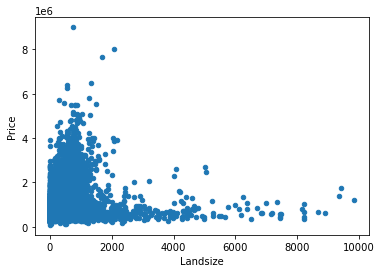

In [39]:
## scatter plot: 2
## exclude outliers 
## Is there insight to you?
melb[melb.Landsize < 10000].plot.scatter(x="Landsize", y="Price")

## Your first model: Linear Regression

### Round 1: Linear is all you need

In [166]:
## First, seperate the whole dataset into 2 parts
## the first 10000 rows as melb_train
## all the others as melb_test
## and you should forget about melb_test when training th model

melb_train = melb[:10000]
melb_test = melb[10000:]

In [167]:
## Scikit-learn 
from sklearn.linear_model import LinearRegression

## Initiate a model with intercept (b_0)
lr_model = LinearRegression(fit_intercept=True)

<AxesSubplot:xlabel='Distance', ylabel='Price'>

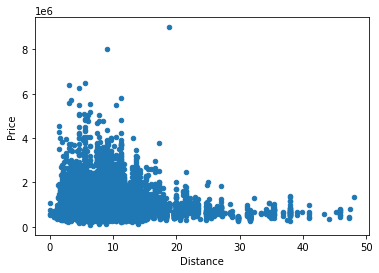

In [169]:
## First we try a model with only one feature: Distance
melb_train.plot.scatter(y="Price", x="Distance")

In [170]:
## select the features
features_in_model = ["Distance"]
X = melb_train[features_in_model]

## select the prediction target
y = melb_train["Price"]

## train the Linear regression model with y and X
lr_model.fit(X, y)

LinearRegression()

b_0 = 1259111.5915
b_1 = -17987.4190


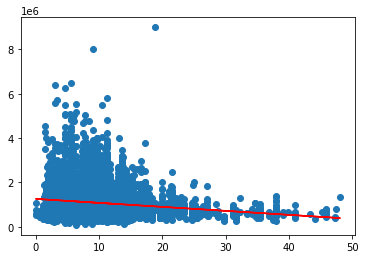

In [171]:
## The model we just fitted is:
## Price = b_0 + b_1 * Distance

print("b_0 = {:.4f}".format(lr_model.intercept_))
print("b_1 = {:.4f}".format(lr_model.coef_[0]))

## plot the result on the scatter plot
lr_pred_price = lr_model.intercept_ + melb_train.Distance*lr_model.coef_[0]

import matplotlib.pyplot as plt
plt.scatter(melb_train.Distance, melb_train.Price)
plt.plot(melb_train.Distance, lr_pred_price , color = "red")

In [172]:
## If the target is prefectly predicted by the feature
## all the data point (blue) will lay on the fitted line (red)
## obviously, this model is not perfect
## But how is it?
print("R^2 = {:.4f}".format(lr_model.score(X, y)))


R^2 = 0.0275


### Round 2: more features, more obstacles

In [173]:
## 0.02 is a poor result
## Distance itself can't have much information for predicting price
## we can try some another combination of features
features_in_model = ["Distance", "Rooms", "YearBuilt", "BuildingArea","Landsize"]

X = melb_train[features_in_model]

## However, there are missing data 
## NaN is "Not a Number"
X.head()

,Distance,Rooms,YearBuilt,BuildingArea,Landsize
0,12.0000,3,1960.0000,120.0000,586.0000
1,6.2000,3,NaN,NaN,449.0000
2,3.5000,3,NaN,NaN,370.0000
3,14.7000,4,2000.0000,244.0000,334.0000
4,13.0000,4,2008.0000,255.0000,354.0000


In [157]:
## When "YearBuilt" is not a number, the model can't multiply it with a coefficient
## We can just keep all the rows with no missing value
## the 2nd and 3rd row will be dropped
flawless_rows = melb_train[features_in_model].isna().sum(axis=1) == 0
flawless_rows.head()


0     True
1    False
2    False
3     True
4     True
dtype: bool

In [174]:
## Select the features, and keep those rows with no missing value
X = X.loc[flawless_rows, features_in_model]

## apply same missing value policy on target
y = melb_train.loc[flawless_rows, "Price"]

## Initiate a model
lr_model_v2 = LinearRegression(fit_intercept=True)

## train the Linear regression model
lr_model.fit(X, y)


LinearRegression()

In [175]:
## The model v2 is:
## Price = b_0 + b_1 * Distance + b_2 * Rooms + b_3 * YearBuilt +
##         b_4 * BuildingArea + b_5 * Landsize

print("b_0 = {:.4f}".format(lr_model.intercept_))
for i in range(len(lr_model.coef_)):
    print("b_{} = {:.4f}".format(i + 1,lr_model.coef_[i]))




b_0 = 8818093.8974
b_1 = -29998.2911
b_2 = 270512.6542
b_3 = -4371.5463
b_4 = 2293.5095
b_5 = 33.8143


In [176]:
## overall performance
## it's far better
print("R^2 = {:.4f}".format(lr_model.score(X, y)))

R^2 = 0.4896


### Evaluate with test data 

In [189]:
## apply same logic on testing data
## oops....... there are missing values in test data, too.....
X_test = melb_test[features_in_model]
y_test = melb_test["Price"]

X_test.head()


,Distance,Rooms,YearBuilt,BuildingArea,Landsize
10000,7.9000,3,1945.0000,170.0000,537.0000
10001,11.7000,3,1980.0000,NaN,273.0000
10002,7.8000,2,1965.0000,77.0000,0.0000
10003,7.5000,5,1915.0000,222.0000,1012.0000
10004,17.9000,3,1965.0000,135.0000,533.0000


In [190]:
## what if just put test data like this into model?
## ummmmmmm......
lr_model.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [196]:
## in part 1 of the tutorial, we drop those rows with missing value
## just like what we did in the training phrase
## how to handle missing values is a topic for later
## but keep in mind: dropping data is bad! 壞份子! 抽煙bad!

flawless_rows_test = melb_test[features_in_model].isna().sum(axis=1) == 0
X_test = melb_test.loc[flawless_rows_test, features_in_model]
y_test = melb_test.loc[flawless_rows_test, "Price"]

## overall performance on test data
print("R^2 on test data = {:.4f}".format(lr_model.score(X_test, y_test)))

R^2 on test data = 0.4808


## Homework 1
1. EDA and data visualization on this data. Share with your pals. Is your story convincing? Is your story implying something helpful to the prediction models? 
2. Try some other models, but keep them LinearRegression(). Record your design and the following train/test R^2. There are some small tips:
    * different combination of variables
    * use categorical variables (in a good way....)
    * do some operations on numerics variables
    * deal with the missing values (since it gives you more data to use)
    
3. The main topic in this part is a regression problem. What if it's a binary classification problem now? (i.e there are only "1" and "0" in y)
    